## Finding the merging of real frequencies into complex modes

### Start by locating the eigenfrequnecies

##### For each frequency omega there are 8 corresponding momenta formed from the Bogliubo disperion relation:
#### $\left( \omega - m k \right)^2 = k^2 \left( \frac{k^2}{4} + \frac{g}{g_u} \right)$, where the ratio of g/g_u changes in x>0 and x<0.

##### There are a total of eight boundary conditions 
##### we can use the boundary conditions to determine the allowed frequencies, these should along with the BCs should produce a zero determinant such that the conditions are satisfied for that omega.
We can then plot this to check if the wave satisfes the bcs.
To do this numerically we can sub values of omega into the boglioubov relation solve for the allowed k and p values, then use these to calculate the determinant if it's is zero this is an allowed frequnecy.

In [399]:
# Define parameters
g_d = 0.2  # Downstream interaction strength
g_u = 1  # Upstream interaction strength
m_u = 0.5 # Upstream mach number
m_d = 1.1  # Downstream mach number
L1 = 60  # Upstream Length 
L2 = 60 # Downstream Lengt


def eigenvalues(omega):
    k_vals = bogoliubov_relation(omega, m_u, g_u, g_u)
    p_vals = bogoliubov_relation(omega, m_u, g_d, g_u)

    k1, k2, k3, k4 = k_vals[:4]
    p1, p2, p3, p4 = p_vals[:4]
    zeta_k = [[1, omega - m_u * k - k**2 / 2 - 1] for k in k_vals]
    zeta_p = [[g_d / g_u, omega - m_u * p - p**2 / 2 - g_d / g_u] for p in p_vals]

    M = np.array([
        [zeta_k[0][0], zeta_k[1][0], zeta_k[2][0], zeta_k[3][0], -zeta_p[0][0], -zeta_p[1][0], -zeta_p[2][0], -zeta_p[3][0]],
        [zeta_k[0][1], zeta_k[1][1], zeta_k[2][1], zeta_k[3][1], -zeta_p[0][1], -zeta_p[1][1], -zeta_p[2][1], -zeta_p[3][1]],
        [1j * k1 * zeta_k[0][0], 1j * k2 * zeta_k[1][0], 1j * k3 * zeta_k[2][0], 1j * k4 * zeta_k[3][0], 
         -1j * p1 * zeta_p[0][0], -1j * p2 * zeta_p[1][0], -1j * p3 * zeta_p[2][0], -1j * p4 * zeta_p[3][0]],
        [1j * k1 * zeta_k[0][1], 1j * k2 * zeta_k[1][1], 1j * k3 * zeta_k[2][1], 1j * k4 * zeta_k[3][1], 
         -1j * p1 * zeta_p[0][1], -1j * p2 * zeta_p[1][1], -1j * p3 * zeta_p[2][1], -1j * p4 * zeta_p[3][1]],
        [np.exp(-1j * k1 * L1) * zeta_k[0][0], np.exp(-1j * k2 * L1) * zeta_k[1][0], 
         np.exp(-1j * k3 * L1) * zeta_k[2][0], np.exp(-1j * k4 * L1 ) * zeta_k[3][0], 0, 0, 0, 0],
        [np.exp(-1j * k1 * L1 ) * zeta_k[0][1], np.exp(-1j * k2 * L1 ) * zeta_k[1][1], 
         np.exp(-1j * k3 * L1 ) * zeta_k[2][1], np.exp(-1j * k4 * L1 ) * zeta_k[3][1], 0, 0, 0, 0],
        [0, 0, 0, 0, np.exp(1j * p1 * L2) * zeta_p[0][0], np.exp(1j * p2 * L2) * zeta_p[1][0], 
         np.exp(1j * p3 * L2) * zeta_p[2][0], np.exp(1j * p4 * L2) * zeta_p[3][0]],
        [0, 0, 0, 0, np.exp(1j * p1 * L2) * zeta_p[0][1], np.exp(1j * p2 * L2) * zeta_p[1][1], 
         np.exp(1j * p3 * L2 ) * zeta_p[2][1], np.exp(1j * p4 * L2) * zeta_p[3][1]]
    ])
    eigen_values = la.eig(M)
    return eigen_values
print(boundary_condition_determinant(omega))

(array([-6.27002211e+25-3.61229297e+25j,  6.27002211e+25+3.61229297e+25j,
        1.46071411e+05+2.13100731e+06j, -6.92039308e+33-9.43326560e+33j,
        2.86798707e+11-1.88274402e+12j,  1.88272882e+11+8.53141750e+11j,
       -2.67250869e+08-3.17334027e+07j,  2.66814973e+08+3.24209528e+07j]), array([[ 3.25285720e-27-9.38881074e-28j, -3.25285720e-27+9.38881074e-28j,
        -1.36613491e-42+1.90763997e-42j,  9.59962769e-36-1.56001322e-35j,
         2.78718736e-41+4.26800160e-42j, -1.30106414e-41+2.88048201e-42j,
        -4.43951301e-41+3.51784222e-41j,  3.03510436e-41-3.21442502e-41j],
       [ 3.99071054e-27-2.15960439e-26j, -3.99071054e-27+2.15960439e-26j,
        -1.94188574e-01-2.56594531e-01j,  2.60112917e-22-1.93637471e-22j,
         1.02499782e-12-6.19216704e-14j, -6.74904529e-13+4.50606072e-14j,
         2.66784296e-09-3.87513969e-09j, -2.72832395e-09+3.85727396e-09j],
       [-1.75461945e-27+9.40346596e-28j,  1.75461945e-27-9.40346596e-28j,
        -7.16732228e-03+2.82745097e-0

In [388]:
## Guess an omega
## Find the corresponding values of k and p that satisfy the Bogoliubov relation 
## Use those values to calculate the vectors zeta_p and zeta_q 
## Apply the boundary conditions to finds all the s_p's and s_q's noting that one is a normalisation condition
## Leaving a single variable omega which can be adjusted so the B.C.s hold

import numpy as np
import scipy.linalg as la
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Define parameters
g_d = 0.2  # Downstream interaction strength
g_u = 1  # Upstream interaction strength
m_u = 0.3 # Upstream mach number
m_d = 1.1  # Downstream mach number
L1 = 2  # Upstream Length 
L2 = 2 # Downstream Length 


# Define the dispersion relation , so we can calculate the sound modes for a given frequnecy(8 in total for both sides)
def bogoliubov_relation(omega, m, g, g_ref):
    """Solve for the roots of Bogoliubov relation"""
    coefficients = [1/4, 0, (g/g_ref) - m**2, 2 * m * omega,-omega**2 ]
    roots = np.roots(coefficients)  # Solve quartic equation for k
    return roots 

## Similarly we have 8 boundary conditions to satisfy which depend on omega therefore satisfying these gives us our modes
## We want to find the values of omega such that this is for some combination of s_p's and s_q's
## M[s_p1,s_p2,s_p3,s_p4,s_q1...]^T = 0
def boundary_condition_determinant(omega):
    k_vals = bogoliubov_relation(omega, m_u, g_u, g_u)
    p_vals = bogoliubov_relation(omega, m_u, g_d, g_u)

    k1, k2, k3, k4 = k_vals[:4]
    p1, p2, p3, p4 = p_vals[:4]
    zeta_k = [[1, omega - m_u * k - k**2 / 2 - 1] for k in k_vals]
    zeta_p = [[g_d / g_u, omega - m_u * p - p**2 / 2 - g_d / g_u] for p in p_vals]

    M = np.array([
        [zeta_k[0][0], zeta_k[1][0], zeta_k[2][0], zeta_k[3][0], -zeta_p[0][0], -zeta_p[1][0], -zeta_p[2][0], -zeta_p[3][0]],
        [zeta_k[0][1], zeta_k[1][1], zeta_k[2][1], zeta_k[3][1], -zeta_p[0][1], -zeta_p[1][1], -zeta_p[2][1], -zeta_p[3][1]],
        [1j * k1 * zeta_k[0][0], 1j * k2 * zeta_k[1][0], 1j * k3 * zeta_k[2][0], 1j * k4 * zeta_k[3][0], 
         -1j * p1 * zeta_p[0][0], -1j * p2 * zeta_p[1][0], -1j * p3 * zeta_p[2][0], -1j * p4 * zeta_p[3][0]],
        [1j * k1 * zeta_k[0][1], 1j * k2 * zeta_k[1][1], 1j * k3 * zeta_k[2][1], 1j * k4 * zeta_k[3][1], 
         -1j * p1 * zeta_p[0][1], -1j * p2 * zeta_p[1][1], -1j * p3 * zeta_p[2][1], -1j * p4 * zeta_p[3][1]],
        [np.exp(-1j * k1 * L1) * zeta_k[0][0], np.exp(-1j * k2 * L1) * zeta_k[1][0], 
         np.exp(-1j * k3 * L1) * zeta_k[2][0], np.exp(-1j * k4 * L1 ) * zeta_k[3][0], 0, 0, 0, 0],
        [np.exp(-1j * k1 * L1 ) * zeta_k[0][1], np.exp(-1j * k2 * L1 ) * zeta_k[1][1], 
         np.exp(-1j * k3 * L1 ) * zeta_k[2][1], np.exp(-1j * k4 * L1 ) * zeta_k[3][1], 0, 0, 0, 0],
        [0, 0, 0, 0, np.exp(1j * p1 * L2) * zeta_p[0][0], np.exp(1j * p2 * L2) * zeta_p[1][0], 
         np.exp(1j * p3 * L2) * zeta_p[2][0], np.exp(1j * p4 * L2) * zeta_p[3][0]],
        [0, 0, 0, 0, np.exp(1j * p1 * L2) * zeta_p[0][1], np.exp(1j * p2 * L2) * zeta_p[1][1], 
         np.exp(1j * p3 * L2 ) * zeta_p[2][1], np.exp(1j * p4 * L2) * zeta_p[3][1]]
    ])
    det = la.det(M)
    return np.abs(det)
def calc_omega(k,g):# use plus root
    return k + np.sqrt(k**2*(g/g_u+k**2/4))


def solve_null_space(omega):
    """
    Solve for the vector S that satisfies M * S = 0 for a given omega.
    """
    # Compute the M matrix for the given omega
    k_vals = bogoliubov_relation(omega, m_u, g_u, g_u)
    p_vals = bogoliubov_relation(omega, m_u, g_d, g_u)

    k1, k2, k3, k4 = k_vals[:4]
    p1, p2, p3, p4 = p_vals[:4]

    zeta_k = [[1, omega - m_u * k - k**2 / 2 - 1] for k in k_vals]
    zeta_p = [[g_d / g_u, omega - m_u * p - p**2 / 2 - g_d / g_u] for p in p_vals]
    
    M = np.array([
        [zeta_k[0][0], zeta_k[1][0], zeta_k[2][0], zeta_k[3][0], -zeta_p[0][0], -zeta_p[1][0], -zeta_p[2][0], -zeta_p[3][0]],
        [zeta_k[0][1], zeta_k[1][1], zeta_k[2][1], zeta_k[3][1], -zeta_p[0][1], -zeta_p[1][1], -zeta_p[2][1], -zeta_p[3][1]],
        [1j * k1 * zeta_k[0][0], 1j * k2 * zeta_k[1][0], 1j * k3 * zeta_k[2][0], 1j * k4 * zeta_k[3][0], 
         -1j * p1 * zeta_p[0][0], -1j * p2 * zeta_p[1][0], -1j * p3 * zeta_p[2][0], -1j * p4 * zeta_p[3][0]],
        [1j * k1 * zeta_k[0][1], 1j * k2 * zeta_k[1][1], 1j * k3 * zeta_k[2][1], 1j * k4 * zeta_k[3][1], 
         -1j * p1 * zeta_p[0][1], -1j * p2 * zeta_p[1][1], -1j * p3 * zeta_p[2][1], -1j * p4 * zeta_p[3][1]],
        [np.exp(-1j * k1 * L1) * zeta_k[0][0], np.exp(-1j * k2 * L1) * zeta_k[1][0], 
         np.exp(-1j * k3 * L1) * zeta_k[2][0], np.exp(-1j * k4 * L1 ) * zeta_k[3][0], 0, 0, 0, 0],
        [np.exp(-1j * k1 * L1 ) * zeta_k[0][1], np.exp(-1j * k2 * L1 ) * zeta_k[1][1], 
         np.exp(-1j * k3 * L1 ) * zeta_k[2][1], np.exp(-1j * k4 * L1 ) * zeta_k[3][1], 0, 0, 0, 0],
        [0, 0, 0, 0, np.exp(1j * p1 * L2) * zeta_p[0][0], np.exp(1j * p2 * L2) * zeta_p[1][0], 
         np.exp(1j * p3 * L2) * zeta_p[2][0], np.exp(1j * p4 * L2) * zeta_p[3][0]],
        [0, 0, 0, 0, np.exp(1j * p1 * L2) * zeta_p[0][1], np.exp(1j * p2 * L2) * zeta_p[1][1], 
         np.exp(1j * p3 * L2 ) * zeta_p[2][1], np.exp(1j * p4 * L2) * zeta_p[3][1]]
    ])

    # Compute the null space of M
    U, s, Vh = np.linalg.svd(M)
    null_mask = (s < 1e-5)  # Identify null space (values close to zero)
    null_space = np.compress(null_mask, Vh, axis=0).T  # Extract null space vectors

    if null_space.shape[1] == 0:
        print("No null space found. The system may not be exactly singular at this omega.")
        return None

    # Normalize the solution
    S = null_space[:, 0]
    S /= np.linalg.norm(S)

    return S

def wave_function(xs,omega,S):
    k_vals = bogoliubov_relation(omega, m_u, g_u, g_u)
    p_vals = bogoliubov_relation(omega, m_u, g_d, g_u)
    k1, k2, k3, k4 = k_vals[:4]
    p1, p2, p3, p4 = p_vals[:4]
    Psi = []
    for x in xs:
        if x <= 0:
            Psi.append((S[0]*np.exp(1j*k1*x) + S[1]*np.exp(1j*k2*x) + S[2]*np.exp(1j*k3*x) + S[3]*np.exp(1j*k4*x)))
        else:
            Psi.append((S[4]*np.exp(1j*p1*x) + S[5]*np.exp(1j*p2*x) + S[6]*np.exp(1j*p3*x) + S[7]*np.exp(1j*p4*x))* (g_d/g_u))
    return Psi




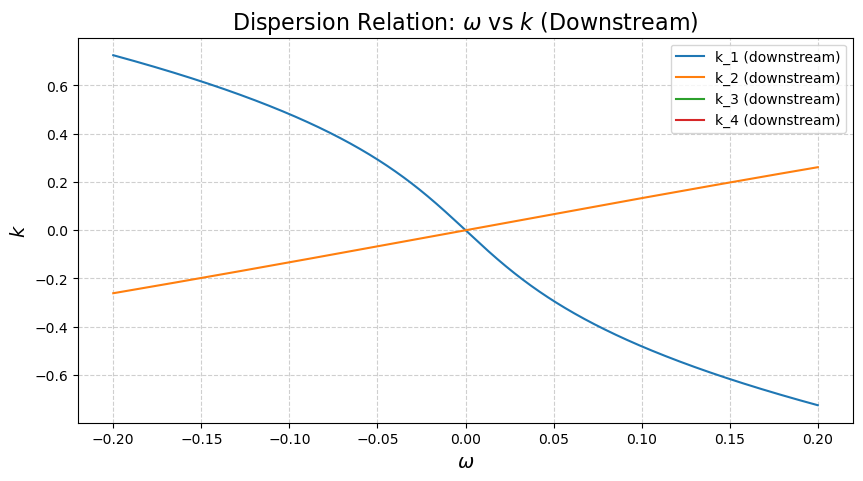

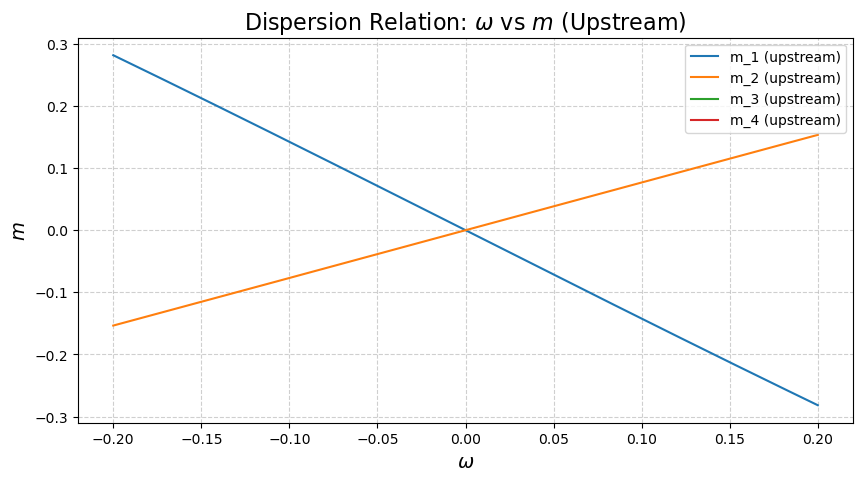

In [389]:

def bogoliubov_relation_real(omega, m, g, g_ref):
    """Solve for the roots of the Bogoliubov relation."""
    coefficients = [1/4, 0, (g/g_ref) - m**2, 2 * m * omega, -omega**2]
    roots = np.roots(coefficients)  # Solve quartic equation for k
    real_roots = roots[np.isreal(roots)].real  # Keep only real roots
    return real_roots

omegas = np.linspace(-0.2, 0.2, 1000)

# Store real k-values for both upstream and downstream
k_values = []
m_values = []

for omega in omegas:
    k_vals = bogoliubov_relation_real(omega, m_u, g_d, g_u)  # Downstream solutions
    m_vals = bogoliubov_relation_real(omega, m_u, g_u, g_u)  # Upstream solutions
    # Pad with NaNs if fewer than 4 real solutions are found
    k_values.append(np.pad(k_vals, (0, 4 - len(k_vals)), constant_values=np.nan))
    m_values.append(np.pad(m_vals, (0, 4 - len(m_vals)), constant_values=np.nan))

k_values = np.array(k_values)
m_values = np.array(m_values)

# Plot omega vs k_values (downstream)
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(omegas, k_values[:, i], label=f'k_{i+1} (downstream)')

plt.xlabel(r'$\omega$', fontsize=14)
plt.ylabel(r'$k$', fontsize=14)
plt.title(r'Dispersion Relation: $\omega$ vs $k$ (Downstream)', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot omega vs m_values (upstream)
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.plot(omegas, m_values[:, i], label=f'm_{i+1} (upstream)')

plt.xlabel(r'$\omega$', fontsize=14)
plt.ylabel(r'$m$', fontsize=14)
plt.title(r'Dispersion Relation: $\omega$ vs $m$ (Upstream)', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


0.5802802802802802


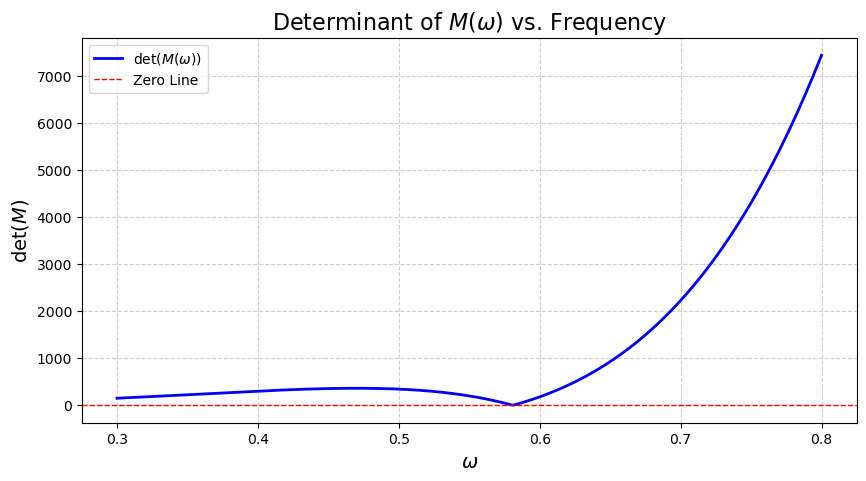

In [390]:
# Compute determinant values for the given omega range
omegas = np.linspace(0.3, 0.8, 1000)
dets = []

for omega in omegas:
    dets.append(boundary_condition_determinant(omega))

dets = np.array(dets)

# Plot determinant vs omega
plt.figure(figsize=(10, 5))
plt.plot(omegas, dets, label=r'$\det(M(\omega))$', color='b', linewidth=2)
plt.axhline(0, color='r', linestyle='--', linewidth=1, label='Zero Line')
plt.xlabel(r'$\omega$', fontsize=14)
plt.ylabel(r'$\det(M)$', fontsize=14)
plt.title(r'Determinant of $M(\omega)$ vs. Frequency', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show

zero_crossings = np.where(np.diff(np.sign(dets - np.min(dets))))[0]
if len(zero_crossings) > 0:
    omega_zero = omegas[zero_crossings[0]]
else:
    omega_zero = omegas[np.argmin(dets)]  # Pick minimum determinant if no zero found
print(omega_zero)


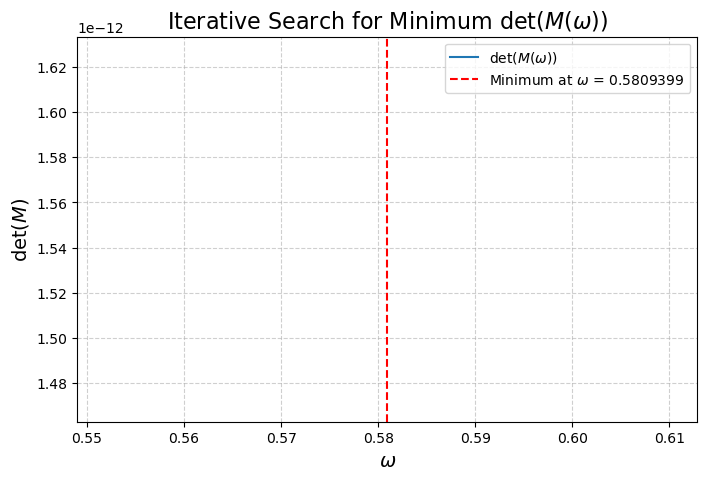

1.548141490713753e-12


In [394]:
# Define initial search range for omega
omega_min, omega_max = 0.5, 0.6
num_points = 100  # Initial number of points in the search range

# Iterative search parameters
num_iterations = 100  # Number of refinement iterations
refinement_factor = 0.1  # How much we refine the search range in each iteration

# Iterative refinement of omega
for iteration in range(num_iterations):
    # Generate omega values in the current range
    omegas = np.linspace(omega_min, omega_max, num_points)
    bcs = np.array([boundary_condition_determinant(omega) for omega in omegas])

    # Find the omega with the minimum determinant value
    min_index = np.argmin(bcs)
    omega_best = omegas[min_index]

    # Update the search range around the best omega found
    omega_range = (omega_max - omega_min) * refinement_factor
    omega_min = max(omega_best - omega_range / 2, omegas[0])  # Ensure range does not exceed bounds
    omega_max = min(omega_best + omega_range / 2, omegas[-1])

# Final refined omega and corresponding determinant value
omega_final = omega_best
bcs_final = boundary_condition_determinant(omega_final)

# Plot the final refined search
plt.figure(figsize=(8, 5))
plt.plot(omegas, bcs, label=r'$\det(M(\omega))$')
plt.axvline(omega_final, color='r', linestyle='--', label=f'Minimum at $\omega$ = {omega_final:.7f}')
plt.xlabel(r'$\omega$', fontsize=14)
plt.ylabel(r'$\det(M)$', fontsize=14)
plt.title(r'Iterative Search for Minimum $\det(M(\omega))$', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print final refined omega value
omega_final
print(bcs_final)

0.5809399207819502


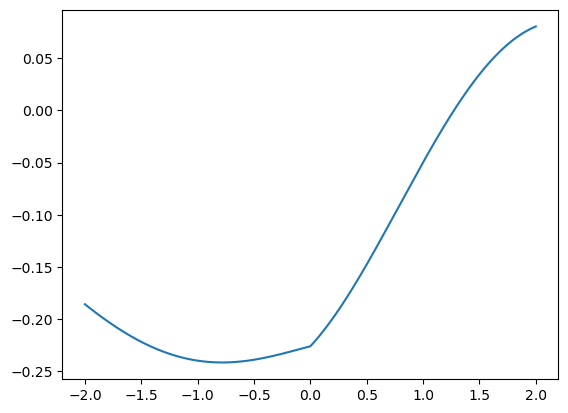

In [395]:
bcs = np.array(bcs)
# Find the omega value where determinant is closest to zero
zero_crossings = np.where(np.diff(np.sign(bcs - np.min(bcs))))[0]
if len(zero_crossings) > 0:
    omega_zero = omegas[zero_crossings[0]]
else:
    omega_zero = omegas[np.argmin(bcs)]  # Pick minimum determinant if no zero found
print(omega_zero)
S = solve_null_space(omega_zero)
xs = np.linspace(-L1,L2,1000)
psi = wave_function(xs,omega_zero,S)
plt.plot(xs,psi)

In [396]:

def check_M(omega,S):
    """
    Solve for the vector S that satisfies M * S = 0 for a given omega.
    """
    # Compute the M matrix for the given omega
    k_vals = bogoliubov_relation(omega, m_u, g_u, g_u)
    p_vals = bogoliubov_relation(omega, m_u, g_d, g_u)

    k1, k2, k3, k4 = k_vals[:4]
    p1, p2, p3, p4 = p_vals[:4]

    zeta_k = [[1, omega - m_u * k - k**2 / 2 - 1] for k in k_vals]
    zeta_p = [[g_d / g_u, omega - m_u * p - p**2 / 2 - g_d / g_u] for p in p_vals]
    

    M = np.array([
        [zeta_k[0][0], zeta_k[1][0], zeta_k[2][0], zeta_k[3][0], -zeta_p[0][0], -zeta_p[1][0], -zeta_p[2][0], -zeta_p[3][0]],
        [zeta_k[0][1], zeta_k[1][1], zeta_k[2][1], zeta_k[3][1], -zeta_p[0][1], -zeta_p[1][1], -zeta_p[2][1], -zeta_p[3][1]],
        [1j * k1 * zeta_k[0][0], 1j * k2 * zeta_k[1][0], 1j * k3 * zeta_k[2][0], 1j * k4 * zeta_k[3][0], 
         -1j * p1 * zeta_p[0][0], -1j * p2 * zeta_p[1][0], -1j * p3 * zeta_p[2][0], -1j * p4 * zeta_p[3][0]],
        [1j * k1 * zeta_k[0][1], 1j * k2 * zeta_k[1][1], 1j * k3 * zeta_k[2][1], 1j * k4 * zeta_k[3][1], 
         -1j * p1 * zeta_p[0][1], -1j * p2 * zeta_p[1][1], -1j * p3 * zeta_p[2][1], -1j * p4 * zeta_p[3][1]],
        [np.exp(-1j * k1 * L1) * zeta_k[0][0], np.exp(-1j * k2 * L1) * zeta_k[1][0], 
         np.exp(-1j * k3 * L1) * zeta_k[2][0], np.exp(-1j * k4 * L1 ) * zeta_k[3][0], 0, 0, 0, 0],
        [np.exp(-1j * k1 * L1 ) * zeta_k[0][1], np.exp(-1j * k2 * L1 ) * zeta_k[1][1], 
         np.exp(-1j * k3 * L1 ) * zeta_k[2][1], np.exp(-1j * k4 * L1 ) * zeta_k[3][1], 0, 0, 0, 0],
        [0, 0, 0, 0, np.exp(1j * p1 * L2) * zeta_p[0][0], np.exp(1j * p2 * L2) * zeta_p[1][0], 
         np.exp(1j * p3 * L2) * zeta_p[2][0], np.exp(1j * p4 * L2) * zeta_p[3][0]],
        [0, 0, 0, 0, np.exp(1j * p1 * L2) * zeta_p[0][1], np.exp(1j * p2 * L2) * zeta_p[1][1], 
         np.exp(1j * p3 * L2 ) * zeta_p[2][1], np.exp(1j * p4 * L2) * zeta_p[3][1]]
    ])
    return M@S
print(check_M(omega_zero,S))

[-4.82253126e-16-3.55618313e-17j  6.85074214e-02-3.09093595e-02j
 -8.79654508e-02-4.15125975e-02j -1.18857776e-01-1.16866848e-01j
 -1.85649401e-01+3.81351848e-02j  8.35802756e-02-2.29349594e-02j
  8.02797848e-02-1.57257100e-01j -1.59917298e-02+1.20809773e-02j]


# End Point 

0.0


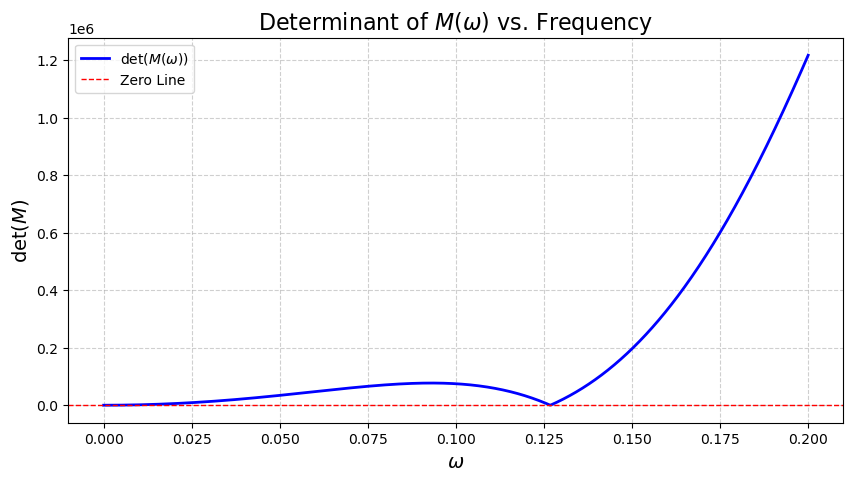

In [199]:
# Compute determinant values for the given omega range
omegas = np.linspace(0, 0.2, 1000)
dets = []

for omega in omegas:
    dets.append(boundary_condition_determinant(omega))

dets = np.array(dets)

# Plot determinant vs omega
plt.figure(figsize=(10, 5))
plt.plot(omegas, dets, label=r'$\det(M(\omega))$', color='b', linewidth=2)
plt.axhline(0, color='r', linestyle='--', linewidth=1, label='Zero Line')
plt.xlabel(r'$\omega$', fontsize=14)
plt.ylabel(r'$\det(M)$', fontsize=14)
plt.title(r'Determinant of $M(\omega)$ vs. Frequency', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show

zero_crossings = np.where(np.diff(np.sign(dets - np.min(dets))))[0]
if len(zero_crossings) > 0:
    omega_zero = omegas[zero_crossings[0]]
else:
    omega_zero = omegas[np.argmin(dets)]  # Pick minimum determinant if no zero found
print(omega_zero)


0.0


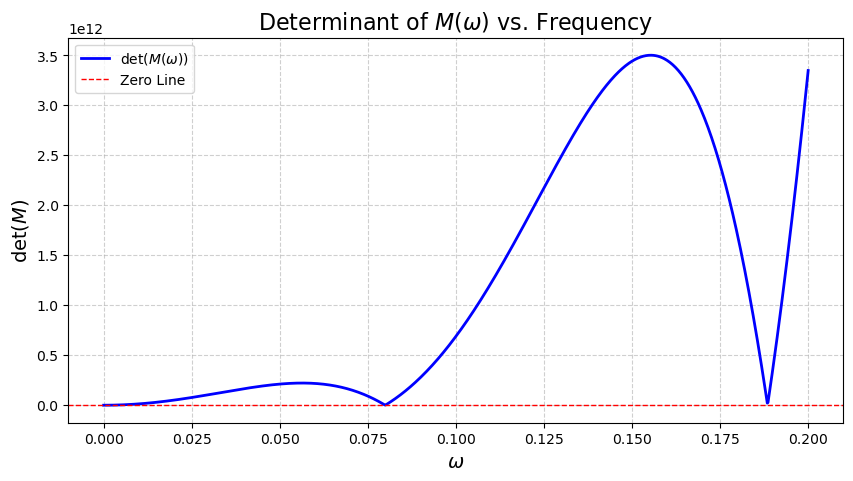

In [202]:
L2 = 10
omegas = np.linspace(0, 0.2, 1000)
dets = []

for omega in omegas:
    dets.append(boundary_condition_determinant(omega))

dets = np.array(dets)

# Plot determinant vs omega
plt.figure(figsize=(10, 5))
plt.plot(omegas, dets, label=r'$\det(M(\omega))$', color='b', linewidth=2)
plt.axhline(0, color='r', linestyle='--', linewidth=1, label='Zero Line')
plt.xlabel(r'$\omega$', fontsize=14)
plt.ylabel(r'$\det(M)$', fontsize=14)
plt.title(r'Determinant of $M(\omega)$ vs. Frequency', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show

zero_crossings = np.where(np.diff(np.sign(dets - np.min(dets))))[0]
if len(zero_crossings) > 0:
    omega_zero = omegas[zero_crossings[0]]
else:
    omega_zero = omegas[np.argmin(dets)]  # Pick minimum determinant if no zero found
print(omega_zero)

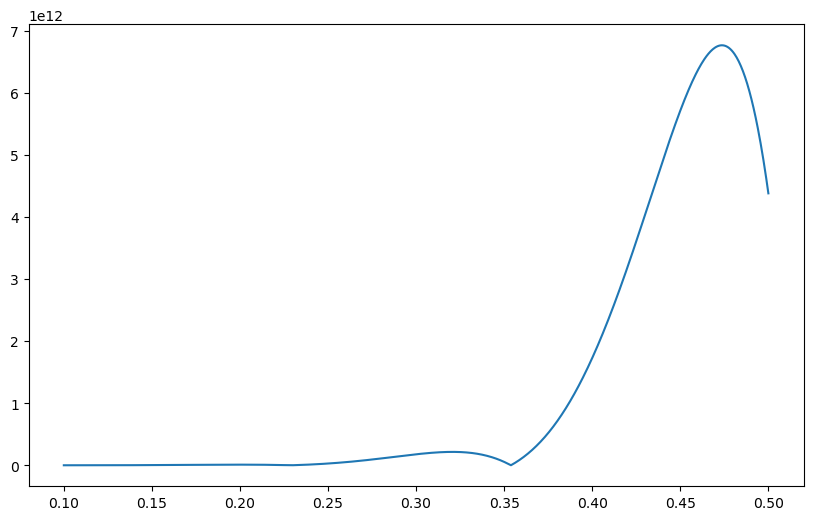

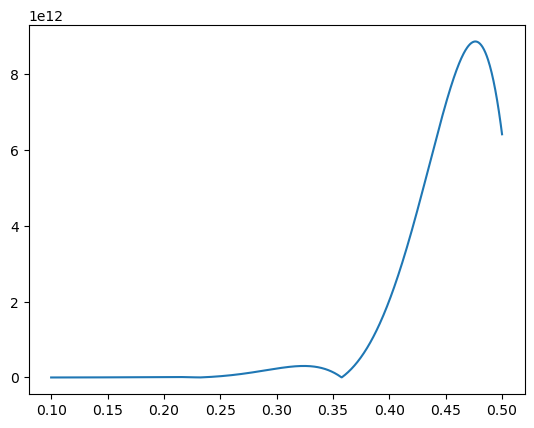

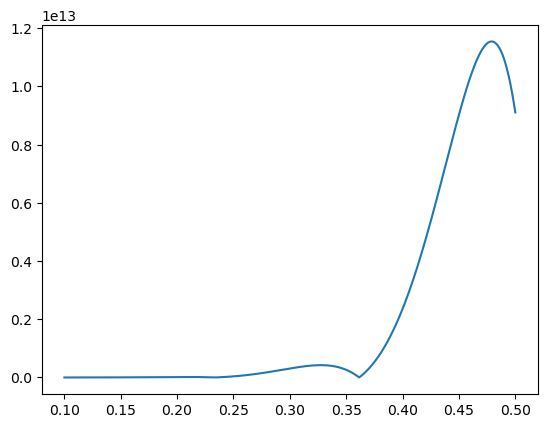

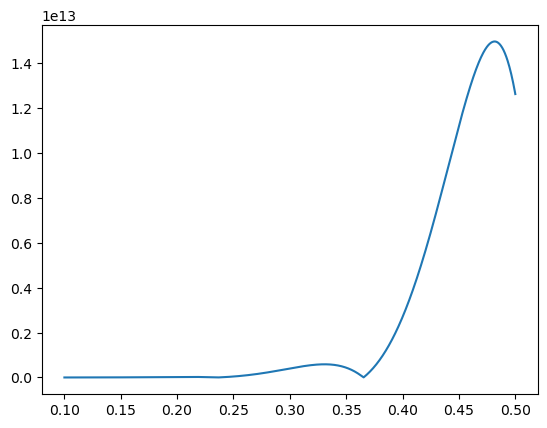

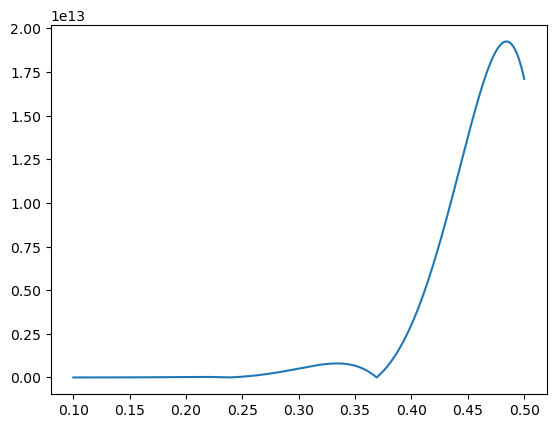

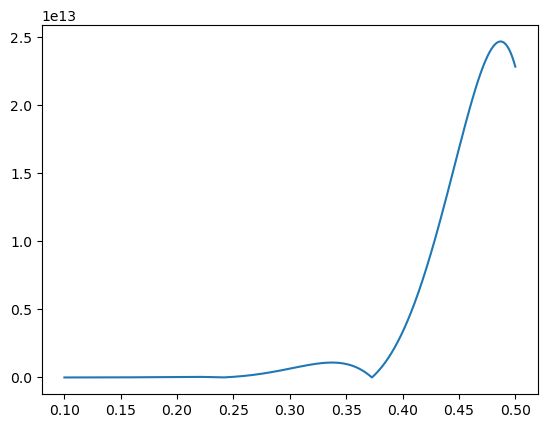

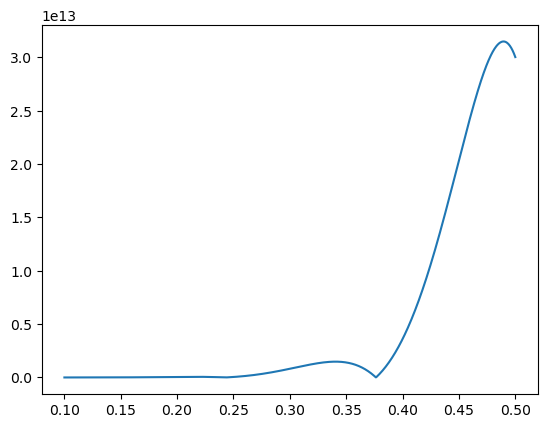

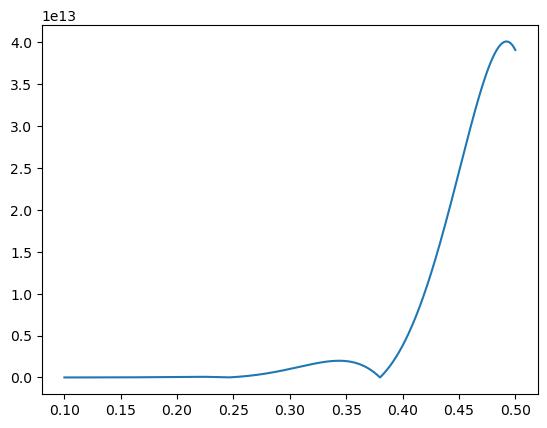

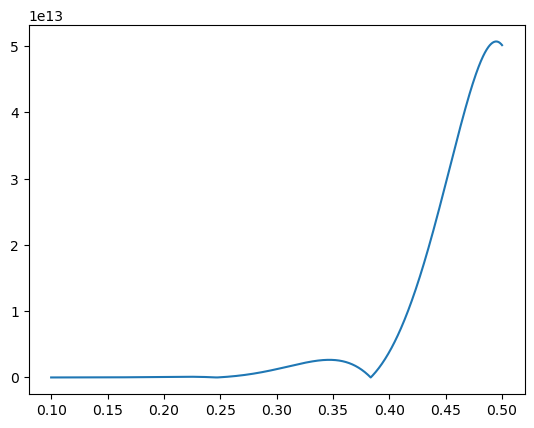

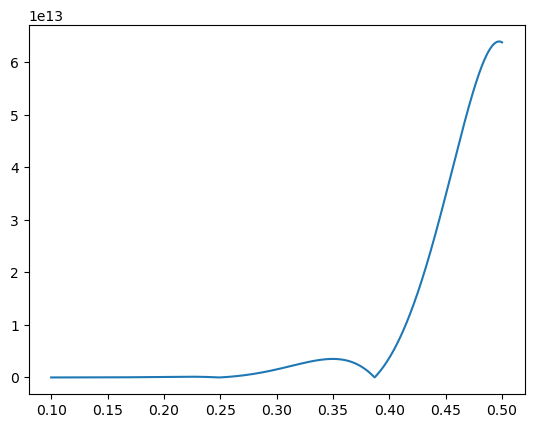

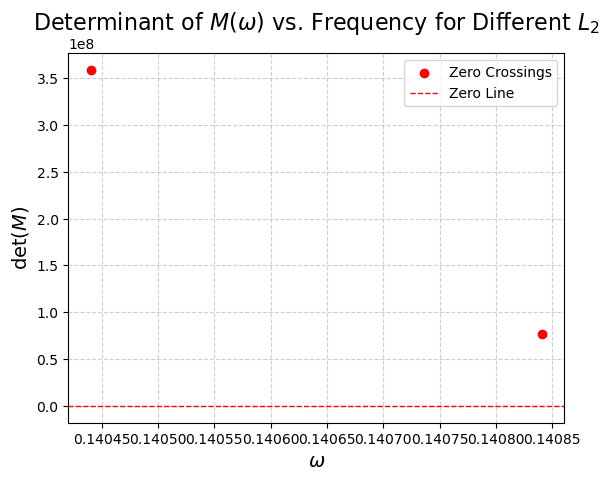

In [287]:
# Define range of L2 values
g_ds = np.arange(0.2, 0.3, 0.01)  # L2 ranging from 10 to 20
omegas = np.linspace(0.1, 0.5, 1000)

# Initialize figure
plt.figure(figsize=(10, 6))

# Iterate over different L2 values
for g_d in g_ds:
    dets = np.array([boundary_condition_determinant(omega) for omega in omegas])
    
    # Plot determinant function for each L2
    plt.plot(omegas, dets, label=rf'$L_2 = {L2}$')
    plt.show()
# Highlight zero crossings
zero_crossings = np.where(np.diff(np.sign(dets - np.min(dets))))[0]
plt.scatter(omegas[zero_crossings], dets[zero_crossings], color='red', marker='o', label='Zero Crossings')

# Plot settings
plt.axhline(0, color='r', linestyle='--', linewidth=1, label='Zero Line')
plt.xlabel(r'$\omega$', fontsize=14)
plt.ylabel(r'$\det(M)$', fontsize=14)
plt.title(r'Determinant of $M(\omega)$ vs. Frequency for Different $L_2$', fontsize=16)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Next Steps:
Once you have two solutions w_1 and w_2 you can add the solutiosn together and solve for a third omega solutions which you can dictate the value of using an and b_n